# Proyek MSML: [Indonesian Fact and Hoax Political News]
- **Nama:** [Tsamarah Muthi'ah Abdullah]
- **Email:** [a135xaf486@devacademy.id]
- **ID Dicoding:** [A135XAF486]

# **1. Perkenalan Dataset**


## 🗂️ Deskripsi Dataset: **Indonesian Fact and Hoax Political News**

Dataset ini merupakan kumpulan berita politik berbahasa Indonesia yang diklasifikasikan ke dalam dua kategori utama: Fakta (valid) dan Hoaks (disinformasi). Dataset ini berasal dari berbagai sumber terpercaya dan tidak terpercaya, dan digunakan untuk melatih model klasifikasi teks dalam mendeteksi berita hoaks.

**📁 File Dataset**

Berikut ini adalah rincian file dan sumbernya:

- dataset_tempo_6k_cleaned.xlsx – Berita politik valid dari Tempo (~6000 entri)

- dataset_kompas_4k_cleaned.xlsx – Berita politik valid dari Kompas (~4000 entri)

- dataset_cnn_10k_cleaned.xlsx – Berita politik valid dari CNN Indonesia (~10.000 entri)

- dataset_turnbackhoax_10_cleaned.xlsx – Berita hoaks dari situs Turnbackhoax.id (~10.000 entri)

**✅ Label Kebenaran**

1. **Valid / Faktual:** Diambil dari portal berita mainstream dan terpercaya: CNN Indonesia, Tempo, dan Kompas.

2. **Hoax / Disinformasi:** Diambil dari situs Turnbackhoax.id, yang menghimpun dan memverifikasi berbagai klaim palsu/menyesatkan.

**🔍 Sumber Dataset**

Dataset ini diunduh dari Kaggle:
[Indonesian Fact and Hoax Political News](https://www.kaggle.com/datasets/linkgish/indonesian-fact-and-hoax-political-news?resource=download)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW
from tqdm.auto import tqdm
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
import random

In [ ]:
!pip install git+https://github.com/psuwa/eda_nlp_indonesia.git

  Cloning https://github.com/psuwa/eda_nlp_indonesia.git to /tmp/pip-req-build-vl4dn6jn
  Running command git clone --filter=blob:none --quiet https://github.com/psuwa/eda_nlp_indonesia.git /tmp/pip-req-build-vl4dn6jn
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/psuwa/eda_nlp_indonesia.git /tmp/pip-req-build-vl4dn6jn did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/psuwa/eda_nlp_indonesia.git /tmp/pip-req-build-vl4dn6jn did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


# **3. Memuat Dataset**

## **Load dataset**

In [ ]:
# Daftar lokasi file dataset
file_paths = [
    '/content/dataset_tempo_6k_cleaned.xlsx',
    '/content/dataset_kompas_4k_cleaned.xlsx',
    '/content/dataset_cnn_10k_cleaned.xlsx',
    '/content/dataset_turnbackhoax_10_cleaned.xlsx'
]

# Muat semua dataset ke dalam dictionary
datasets = {}

# Iterasi untuk memuat dataset
for i, file_path in enumerate(file_paths, 1):
    # Membaca dataset
    df = pd.read_excel(file_path)
    # Menyimpan dataset ke dalam dictionary dengan kunci 'dataset{i}'
    datasets[f'dataset{i}'] = df

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **Dataset 1 (TEMPO)**

In [ ]:
# Menampilkan beberapa baris pertama dari salah satu dataset
print(datasets['dataset1'].head())  # Menampilkan dataset1

   Unnamed: 0                                              Title  \
0           0  Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...   
1           1  Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...   
2           2  Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...   
3           3  Top Nasional: Strategi Hadapi Omicron, Lemhana...   
4           4  Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...   

                         Timestamp  \
0  Sabtu, 1 Januari 2022 17:14 WIB   
1  Sabtu, 1 Januari 2022 15:05 WIB   
2  Sabtu, 1 Januari 2022 12:05 WIB   
3  Sabtu, 1 Januari 2022 07:28 WIB   
4  Sabtu, 1 Januari 2022 07:02 WIB   

                                            FullText  \
0  TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin...   
1  TEMPO.CO, Jakarta - Menteri Agama Yaqut Cholil...   
2  TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...   
3  TEMPO.CO, Jakarta - Berita yang banyak menarik...   
4  TEMPO.CO, Jakarta - Menteri Pendayagunaan Apar...   

                         

## **Info Struktur Dataset**

In [ ]:
# Menampilkan informasi lebih lanjut tentang dataset tertentu
print(datasets['dataset1'].info())  # Menampilkan informasi dataset1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6592 entries, 0 to 6591
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6592 non-null   int64 
 1   Title       6592 non-null   object
 2   Timestamp   6592 non-null   object
 3   FullText    6592 non-null   object
 4   Tags        6591 non-null   object
 5   Author      6592 non-null   object
 6   Url         6592 non-null   object
 7   text_new    6592 non-null   object
 8   hoax        6592 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 463.6+ KB
None


## **Distribusi Label 'hoax'**

In [ ]:
# Menampilkan distribusi label 'hoax' untuk dataset tertentu
print(datasets['dataset1']['hoax'].value_counts())  # Distribusi label dataset1

hoax
0    6592
Name: count, dtype: int64


## **Dataset 2 (KOMPAS)**

In [ ]:
# Menampilkan beberapa baris pertama dari salah satu dataset
print(datasets['dataset2'].head())  # Menampilkan dataset2

   Unnamed: 0                                              Title  \
0           0  Efek Ekor Jas Pencalonan Anies, Elektabilitas ...   
1           1  Ekonomi 2024 Ditargetkan Tumbuh 5,7 Persen, pa...   
2           2  Survei Litbang Kompas: PDI-P, Gerindra, dan Go...   
3           3  Survei Litbang "Kompas": Popularitas Golkar Te...   
4           4  "Endorsement" dan Basa-basi Politik ala Jokowi...   

                            Timestamp  \
0         21 Februari 2023, 15:30 WIB   
1  Kompas.com - 21/02/2023, 14:22 WIB   
2         21 Februari 2023, 09:58 WIB   
3  Kompas.com - 21/02/2023, 05:23 WIB   
4  Kompas.com - 21/02/2023, 05:20 WIB   

                                            FullText  \
0  Hasil jajak pendapat yang diselenggarakan Litb...   
1  JAKARTA, KOMPAS.com - Pemerintah menargetkan p...   
2  PDI-Perjuangan, Partai Gerindra, dan Partai Go...   
3  JAKARTA, KOMPAS.com - Survei Litbang Kompas Ja...   
4   JAKARTA, KOMPAS.com - Presiden Joko Widodo la...   

       

## **Info Struktur Dataset**

In [ ]:
# Menampilkan informasi lebih lanjut tentang dataset tertentu
print(datasets['dataset2'].info())  # Menampilkan informasi dataset2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4750 non-null   int64 
 1   Title       4729 non-null   object
 2   Timestamp   4729 non-null   object
 3   FullText    4723 non-null   object
 4   Tags        4592 non-null   object
 5   Author      4413 non-null   object
 6   Url         4750 non-null   object
 7   text_new    4723 non-null   object
 8   hoax        4750 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 334.1+ KB
None


## **Distribusi Label 'hoax'**

In [ ]:
# Menampilkan distribusi label 'hoax' untuk dataset tertentu
print(datasets['dataset2']['hoax'].value_counts())  # Distribusi label dataset2

hoax
0    4750
Name: count, dtype: int64


## **Dataset 3 (CNN)**

In [ ]:
# Menampilkan beberapa baris pertama dari salah satu dataset
print(datasets['dataset3'].head())  # Menampilkan dataset3

   Unnamed: 0                                              Title  \
0           0  Anies di Milad BKMT: Pengajian Menghasilkan Ib...   
1           1  Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...   
2           2  PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...   
3           3    Gede Pasek Doakan AHY Jadi Capres atau Cawapres   
4           4  PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...   

                       Timestamp  \
0  Selasa, 21 Feb 2023 21:22 WIB   
1  Selasa, 21 Feb 2023 20:46 WIB   
2  Selasa, 21 Feb 2023 20:33 WIB   
3  Selasa, 21 Feb 2023 19:58 WIB   
4  Selasa, 21 Feb 2023 18:56 WIB   

                                            FullText  \
0  Jakarta, CNN Indonesia -- Mantan Gubernur DKI ...   
1  Medan, CNN Indonesia -- Gubernur Sumatera Utar...   
2  Jakarta, CNN Indonesia -- Partai Kebangkitan B...   
3  Jakarta, CNN Indonesia -- Ketua Umum Partai Ke...   
4  Jakarta, CNN Indonesia -- Dewan Pimpinan Pusat...   

                                     

## **Info Struktur Dataset**

In [ ]:
# Menampilkan informasi lebih lanjut tentang dataset tertentu
print(datasets['dataset3'].info())  # Menampilkan informasi dataset3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9630 entries, 0 to 9629
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9630 non-null   int64 
 1   Title       9630 non-null   object
 2   Timestamp   9630 non-null   object
 3   FullText    9630 non-null   object
 4   Tags        9627 non-null   object
 5   Author      9630 non-null   object
 6   Url         9630 non-null   object
 7   text_new    9630 non-null   object
 8   hoax        9630 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 677.2+ KB
None


## **Distribusi Label 'hoax'**

In [ ]:
# Menampilkan distribusi label 'hoax' untuk dataset tertentu
print(datasets['dataset3']['hoax'].value_counts())  # Distribusi label dataset3

hoax
0    9630
Name: count, dtype: int64


## 🧠 Analisis 3 Dataset Berita Indonesia (Kompas, Tempo, dan CNN)

**Kolom-kolom yang ada diantara 3 dataset ini antara lain:**

- **Unnamed: 0** : Kolom ini mungkin merupakan index dari dataset.

- **Title:** Judul artikel atau berita.

- **Timestamp:** Waktu terbit berita/artikel.

- **FullText:** Isi lengkap dari artikel.

- **Tags:** Tag atau kata kunci yang terkait dengan artikel.

- **Author:** Penulis artikel.

- **Url:** Link ke artikel sumber.

- **text_new:** Teks baru yang sudah diproses untuk analisis (sudah dibersihkan atau disaring).

- **hoax:** Label yang menunjukkan apakah artikel tersebut hoax (1) atau bukan hoax (0).

## **Dataset 4 (TURNBACKHOAX)**

In [ ]:
# Menampilkan beberapa baris pertama dari salah satu dataset
print(datasets['dataset4'].head())  # Menampilkan dataset4

   Unnamed: 0                                              Title  \
0           0  [SALAH] Anies Baswedan Dekat Dengan Aliran Krs...   
1           1  [SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...   
2           2      [SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT   
3           3  [SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...   
4           4  [SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...   

           Timestamp                                           FullText  \
0      Maret 1, 2023  Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...   
1      Maret 1, 2023  Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...   
2  Februari 28, 2023  Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...   
3  Februari 28, 2023  Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...   
4  Februari 28, 2023  Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...   

                Tags                  Author  \
0  Fitnah;Hasut;Hoax  Pemeriksa Fakta Junior   
1  Fitnah;Hasut;Hoax  Pemeriksa Fakta Junior

## **Info Struktur Dataset**

In [ ]:
# Menampilkan informasi lebih lanjut tentang dataset tertentu
print(datasets['dataset4'].info())  # Menampilkan informasi dataset4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10381 entries, 0 to 10380
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10381 non-null  int64 
 1   Title         10381 non-null  object
 2   Timestamp     10381 non-null  object
 3   FullText      10381 non-null  object
 4   Tags          10381 non-null  object
 5   Author        10381 non-null  object
 6   Url           10381 non-null  object
 7   politik       10381 non-null  int64 
 8   Narasi        10381 non-null  object
 9   Clean Narasi  6502 non-null   object
 10  hoax          10381 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 892.2+ KB
None


## **Distribusi Label 'hoax'**

In [ ]:
# Menampilkan distribusi label 'hoax' untuk dataset tertentu
print(datasets['dataset4']['hoax'].value_counts())  # Distribusi label dataset4

hoax
1    10381
Name: count, dtype: int64


## 🧠 Analisis Dataset Turnbackhoax

**Kolom-kolom yang ada diantara dataset ini antara lain:**

- **Unnamed: 0** : Kolom ini mungkin merupakan index dari dataset.

- **Title:** Judul artikel atau berita.

- **Timestamp:** Waktu terbit berita/artikel.

- **FullText:** Isi hasil verifikasi hoaks dari turnbackhoax.id. Berisi hasil pemeriksaan fakta.

- **Tags:** Tag atau kata kunci yang terkait dengan artikel.

- **Author:** Penulis artikel.

- **Url:** Link ke artikel sumber.

- **politik :** Indikator apakah konten terkait politik (1) atau tidak (0).

- **Narasi :** Teks asli narasi hoaks yang tersebar (biasanya dari medsos atau WA).

- **Clean_Narasi:** Narasi baru yang sudah diproses untuk analisis (sudah dibersihkan atau disaring).

- **hoax:** Label yang menunjukkan apakah artikel tersebut hoax (1) atau bukan hoax (0).

## **CEK MISSING VALUE KE-4 DATASET**

In [ ]:
# Mengecek nilai kosong untuk setiap dataset dalam dictionary
for dataset_name, df in datasets.items():
    print(f"Nilai kosong di {dataset_name}:")
    print(df.isnull().sum())  # Menampilkan jumlah nilai kosong di setiap kolom
    print("\n")

Nilai kosong di dataset1:
Unnamed: 0    0
Title         0
Timestamp     0
FullText      0
Tags          1
Author        0
Url           0
text_new      0
hoax          0
dtype: int64


Nilai kosong di dataset2:
Unnamed: 0      0
Title          21
Timestamp      21
FullText       27
Tags          158
Author        337
Url             0
text_new       27
hoax            0
dtype: int64


Nilai kosong di dataset3:
Unnamed: 0    0
Title         0
Timestamp     0
FullText      0
Tags          3
Author        0
Url           0
text_new      0
hoax          0
dtype: int64


Nilai kosong di dataset4:
Unnamed: 0         0
Title              0
Timestamp          0
FullText           0
Tags               0
Author             0
Url                0
politik            0
Narasi             0
Clean Narasi    3879
hoax               0
dtype: int64




## 📊 Ringkasan Missing Values per Dataset

| Kolom               | Dataset 1 | Dataset 2 | Dataset 3 | Dataset 4 |
|---------------------|-----------|-----------|-----------|-----------|
| Unnamed: 0          | 0         | 0         | 0         | 0         |
| Title               | 0         | 21        | 0         | 0         |
| Timestamp           | 0         | 21        | 0         | 0         |
| FullText            | 0         | 27        | 0         | 0         |
| Tags                | 1         | 158       | 3         | 0         |
| Author              | 0         | 337       | 0         | 0         |
| Url                 | 0         | 0         | 0         | 0         |
| text_new / Clean Narasi | 0     | 27        | 0         | 3879      |
| politik             | -         | -         | -         | 0         |
| Narasi              | -         | -         | -         | 0         |
| hoax                | 0         | 0         | 0         | 0         |

> Keterangan:
> - Simbol `-` menandakan kolom tersebut tidak tersedia di dataset terkait.
> - `text_new` digunakan di Dataset 1–3, sedangkan `Clean Narasi` digunakan di Dataset 4.

In [ ]:
# File dataset
datasets = {
    "Dataset 1 (Tempo)": "/content/dataset_tempo_6k_cleaned.xlsx",
    "Dataset 2 (Kompas)": "/content/dataset_kompas_4k_cleaned.xlsx",
    "Dataset 3 (CNN)": "/content/dataset_cnn_10k_cleaned.xlsx",
    "Dataset 4 (TurnBackHoax)": "/content/dataset_turnbackhoax_10_cleaned.xlsx"
}

# Load semua dataset
dfs = {name: pd.read_excel(path) for name, path in datasets.items()}

## 🔍 **Cek Duplikat pada Kolom Text_New & Narasi**

In [ ]:
for name, df in dfs.items():
    text_col = "text_new" if "text_new" in df.columns else "Clean Narasi"
    if text_col in df.columns:
        dup_count = df.duplicated(subset=text_col).sum()
        print(f"Duplikat pada {name} (kolom {text_col}): {dup_count} baris")
    else:
        print(f"{name} tidak memiliki kolom text_new atau Clean Narasi.")

Duplikat pada Dataset 1 (Tempo) (kolom text_new): 0 baris
Duplikat pada Dataset 2 (Kompas) (kolom text_new): 26 baris
Duplikat pada Dataset 3 (CNN) (kolom text_new): 0 baris
Duplikat pada Dataset 4 (TurnBackHoax) (kolom Clean Narasi): 3894 baris


**🔎 Analisis Duplikasi Data**

1️⃣**Dataset 1 (Tempo)** tidak memiliki baris duplikat pada kolom text_new, menunjukkan bahwa seluruh isi teks dalam dataset ini bersifat unik.

2️⃣**Dataset 2 (Kompas)** mengandung **26 baris duplikat** pada kolom text_new, yang bisa menandakan adanya pengulangan konten atau redundansi artikel.

3️⃣**Dataset 3 (CNN)** juga tidak memiliki duplikasi pada kolom text_new, menandakan kualitas unik dari teks yang disediakan.

4️⃣**Dataset 4 (TurnBackHoax)** memiliki **3894 baris duplikat** pada kolom Clean Narasi, yang merupakan jumlah signifikan (sekitar 37% dari total data). Hal ini bisa berdampak negatif terhadap model machine learning karena data berulang dapat menyebabkan bias atau overfitting.

## **📏 Distribusi Panjang Teks**


📐 Distribusi Panjang Teks - Dataset 1 (Tempo):
count    6592.000000
mean      780.943416
std       675.474494
min        47.000000
25%       271.000000
50%       564.000000
75%      1096.000000
max      5007.000000
Name: text_length, dtype: float64


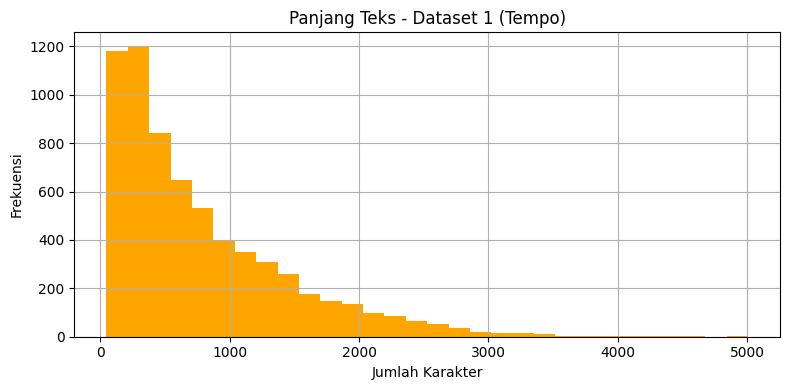


📐 Distribusi Panjang Teks - Dataset 2 (Kompas):
count     4750.000000
mean      1923.358947
std       1360.584491
min          3.000000
25%       1277.000000
50%       1719.000000
75%       2235.000000
max      24416.000000
Name: text_length, dtype: float64


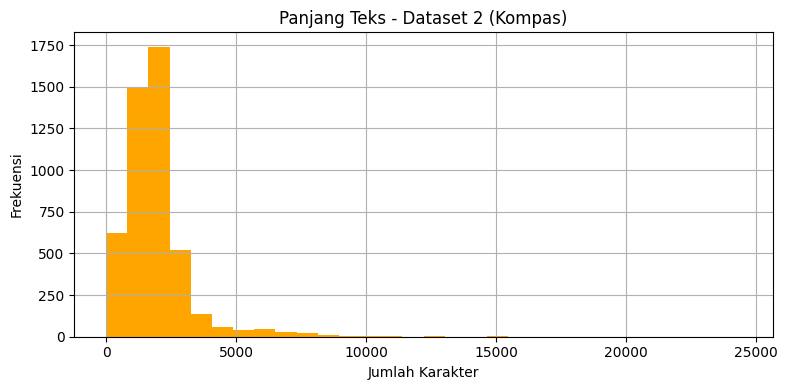


📐 Distribusi Panjang Teks - Dataset 3 (CNN):
count    9630.000000
mean     2065.717965
std       715.438696
min        86.000000
25%      1574.000000
50%      1914.000000
75%      2397.000000
max      8884.000000
Name: text_length, dtype: float64


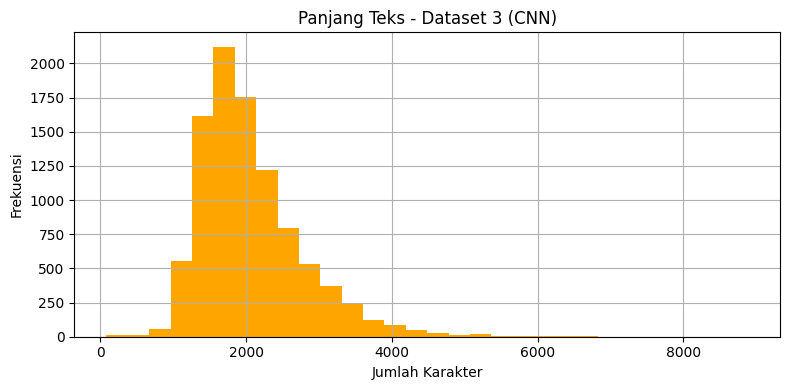


📐 Distribusi Panjang Teks - Dataset 4 (TurnBackHoax):
count    10381.000000
mean       695.095559
std       1448.638237
min          1.000000
25%          3.000000
50%        111.000000
75%        765.000000
max      32491.000000
Name: text_length, dtype: float64


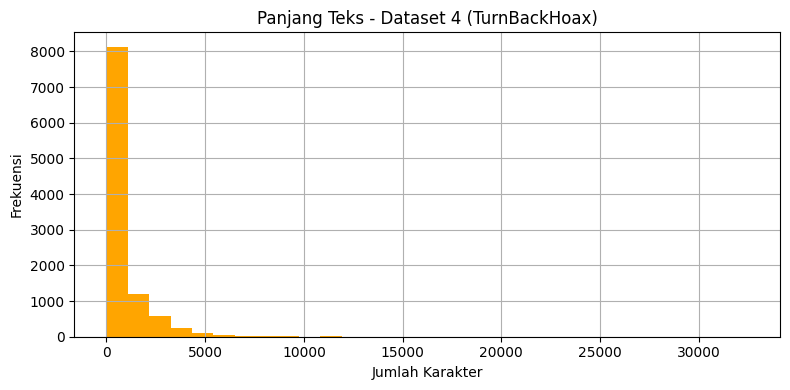

In [ ]:
for name, df in dfs.items():
    text_col = "text_new" if "text_new" in df.columns else "Clean Narasi"
    if text_col in df.columns:
        df["text_length"] = df[text_col].astype(str).apply(len)
        print(f"\n📐 Distribusi Panjang Teks - {name}:")
        print(df["text_length"].describe())
        plt.figure(figsize=(8, 4))
        df["text_length"].hist(bins=30, color="orange")
        plt.title(f"Panjang Teks - {name}")
        plt.xlabel("Jumlah Karakter")
        plt.ylabel("Frekuensi")
        plt.tight_layout()
        plt.show()

## **📊 Analisis Distribusi Panjang Teks**

**1. Dataset 1 (Tempo)**

- Rata-rata panjang teks: **781 kata**, dengan panjang maksimal 5007 dan minimal 47.
- Sebagian besar artikel bersifat sedang hingga panjang (50% artikel < 564 kata).

**2. Dataset 2 (Kompas)**
- Rata-rata panjang teks: **1923 kata**, dengan maksimum 24416 dan minimum ekstrem 3 kata.
- Artikel cenderung panjang; nilai minimum dan standar deviasi yang tinggi menunjukkan kemungkinan outlier.

**3. Dataset 3 (CNN)**

- Panjang teks cukup stabil dengan rata-rata **2066 kata**, dan distribusi relatif ketat (std 715).
- Artikel umumnya panjang dan padat informasi; ideal untuk analisis mendalam seperti summarization atau topic modeling.

**4. Dataset 4 (TurnBackHoax)**

- Memiliki panjang teks terpendek secara median (111 kata) dan minimum ekstrem 1 kata, tetapi panjang maksimal sangat tinggi (32491 kata).
- Distribusi sangat menyebar (std 1448); ini menandakan banyak variasi dan kemungkinan keberadaan data noise.

## ☁️ **Word Cloud**

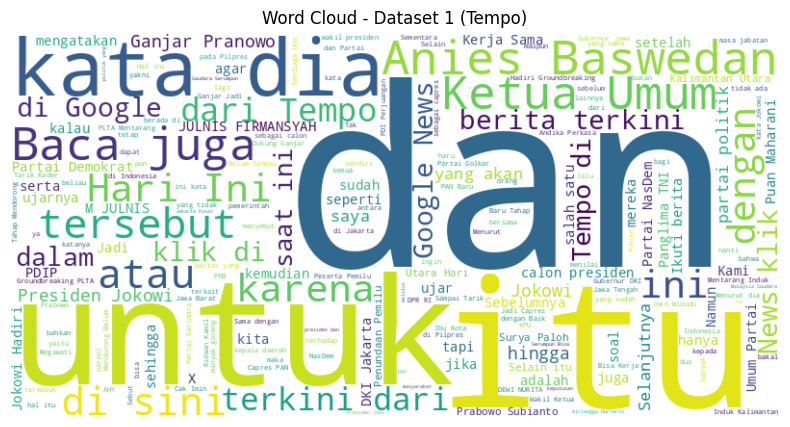

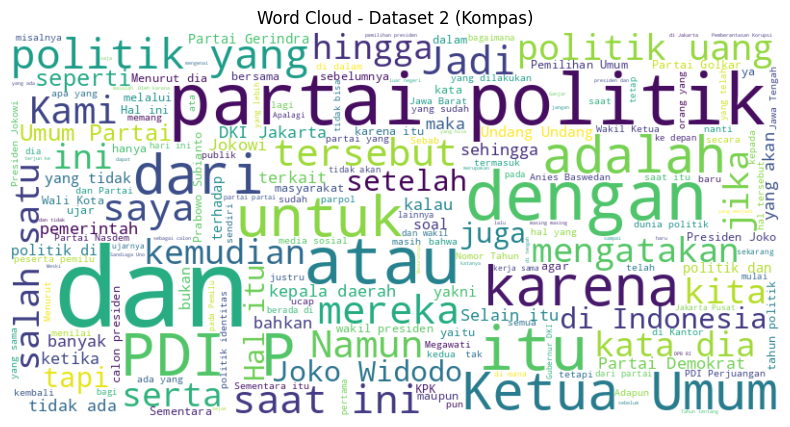

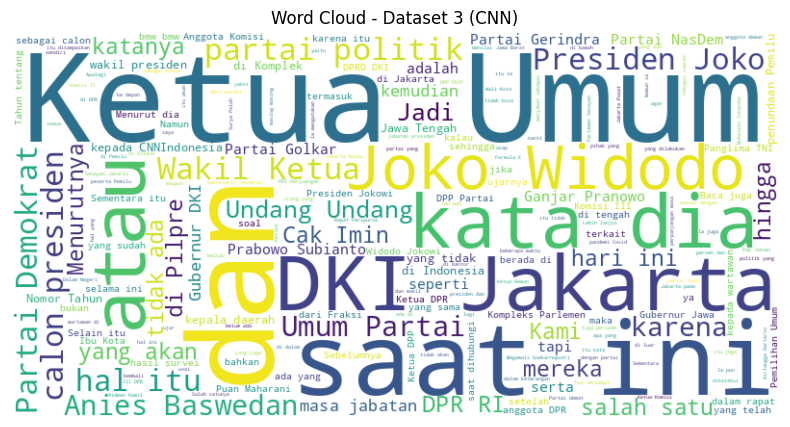

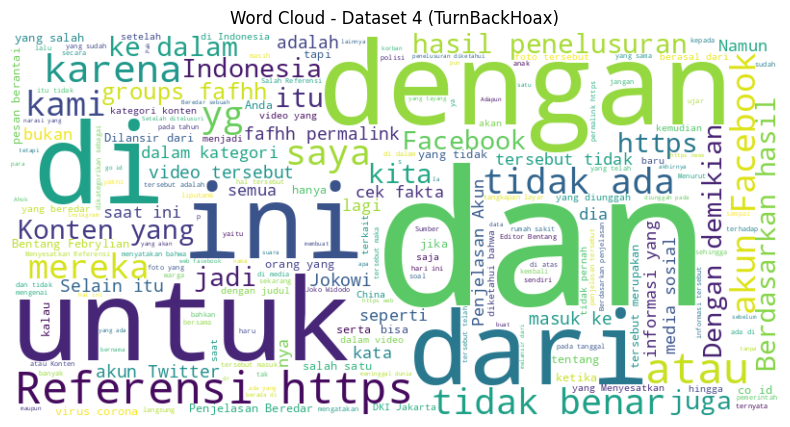

In [ ]:
for name, df in dfs.items():
    text_col = "text_new" if "text_new" in df.columns else "Clean Narasi"
    if text_col in df.columns:
        combined_text = " ".join(df[text_col].dropna().astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud - {name}")
        plt.show()

**✨Fungsi wordclouds** dalam EDA (Exploratory Data Analysis) adalah untuk visualisasi frekuensi kata dalam kumpulan teks secara intuitif dan menarik. Wordcloud menampilkan kata-kata yang paling sering muncul dalam bentuk "awan" di mana:

1. Ukuran kata mencerminkan frekuensi atau kepentingannya dalam teks.
2. Kata yang lebih besar berarti lebih sering muncul.
3. Kata yang kecil atau tidak terlihat berarti jarang muncul atau tidak penting.

**Stopwords Dominan:**

Kata-kata seperti "dan", "untuk", "itu", "atau", "juga", dan "dari" sangat menonjol. Ini menunjukkan bahwa teks masih banyak mengandung stopwords (kata umum dalam bahasa Indonesia) yang tidak banyak memberikan makna kontekstual. Ini menandakan perlunya preprocessing seperti penghapusan stopwords untuk analisis lebih dalam.

## **🔠 Frekuensi Kata Teratas (dengan stop words Bahasa Indonesia)**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


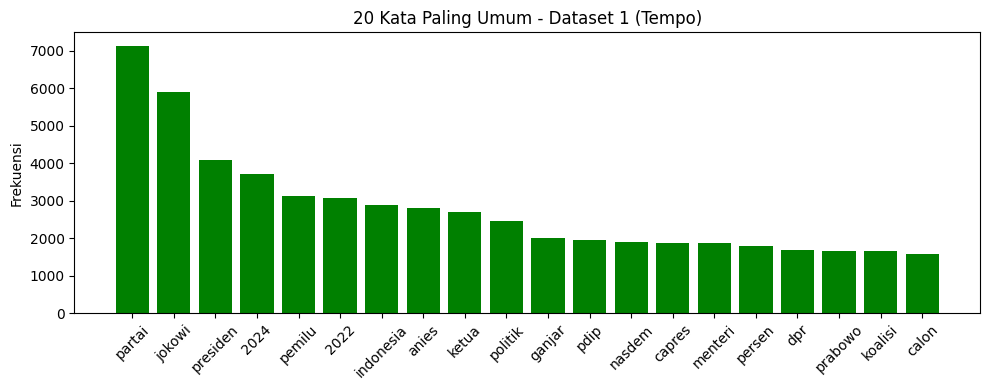

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


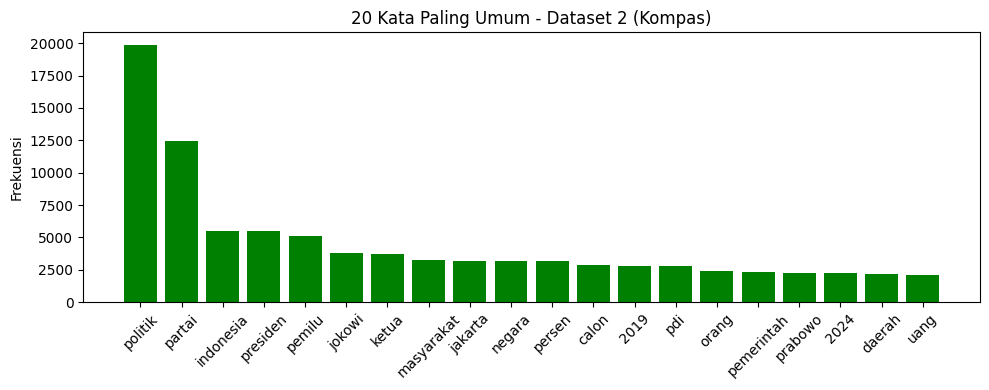

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


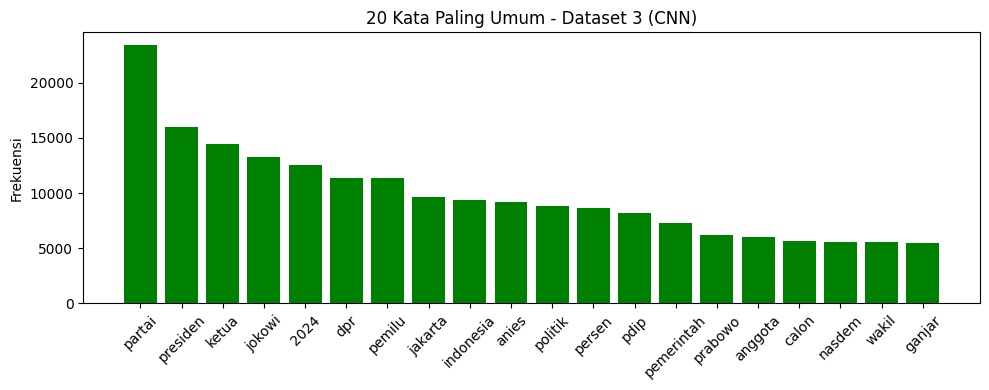

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


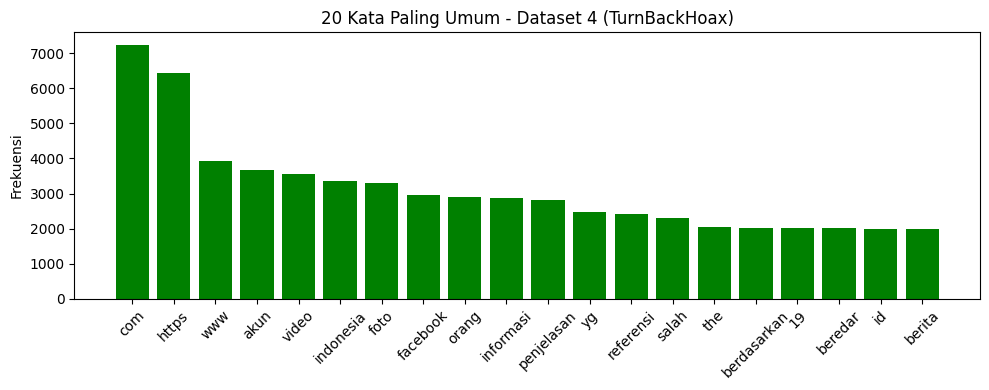

In [ ]:
# stopwords bahasa Indonesia sudah diunduh dari NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

# Ambil stopwords Bahasa Indonesia dari NLTK
stop_words_ind = stopwords.words('indonesian')

# Proses untuk setiap dataset
for name, df in dfs.items():
    text_col = "text_new" if "text_new" in df.columns else "Clean Narasi"
    if text_col in df.columns:
        corpus = df[text_col].dropna().astype(str).tolist()
        vectorizer = CountVectorizer(stop_words=stop_words_ind, max_features=20)
        X = vectorizer.fit_transform(corpus)
        word_freq = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
        sorted_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

        plt.figure(figsize=(10, 4))
        plt.bar(sorted_freq.keys(), sorted_freq.values(), color="green")
        plt.xticks(rotation=45)
        plt.title(f"20 Kata Paling Umum - {name}")
        plt.ylabel("Frekuensi")
        plt.tight_layout()
        plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## **1. Penggabungan Dataset**

In [ ]:
# Gabungkan semua dataset
combined_df = pd.concat(dfs.values(), ignore_index=True)

print("Jumlah data setelah digabung:", combined_df.shape)

Jumlah data setelah digabung: (31353, 12)


In [ ]:
# Cek 5 baris pertama
print(combined_df.head())

   Unnamed: 0                                              Title  \
0           0  Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...   
1           1  Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...   
2           2  Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...   
3           3  Top Nasional: Strategi Hadapi Omicron, Lemhana...   
4           4  Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...   

                         Timestamp  \
0  Sabtu, 1 Januari 2022 17:14 WIB   
1  Sabtu, 1 Januari 2022 15:05 WIB   
2  Sabtu, 1 Januari 2022 12:05 WIB   
3  Sabtu, 1 Januari 2022 07:28 WIB   
4  Sabtu, 1 Januari 2022 07:02 WIB   

                                            FullText  \
0  TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin...   
1  TEMPO.CO, Jakarta - Menteri Agama Yaqut Cholil...   
2  TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...   
3  TEMPO.CO, Jakarta - Berita yang banyak menarik...   
4  TEMPO.CO, Jakarta - Menteri Pendayagunaan Apar...   

                         

In [ ]:
# Cek semua nama kolom
print("\n🧾 Kolom-kolom yang tersedia:")
print(combined_df.columns.tolist())


🧾 Kolom-kolom yang tersedia:
['Unnamed: 0', 'Title', 'Timestamp', 'FullText', 'Tags', 'Author', 'Url', 'text_new', 'hoax', 'politik', 'Narasi', 'Clean Narasi']


## **2. Penggabungan Kolom text_new dan Clean Narasi**

Kolom **text_new** berasal dari 3 dataset Valid (Tempo, Kompas, dan CNN), sedangkan kolom **Clean Narasi** dari dataset ke 4 yang berisi data hoax dari TurnBackHoax, jadi lebih baik digabungkan dalam 1 kolom yaitu kolom **text** untuk memudahkan pelatihan.

In [ ]:
# Buat kolom 'text' dari text_new, lalu isi nilai NaN dengan Clean Narasi
combined_df['text'] = combined_df['text_new'].fillna(combined_df['Clean Narasi'])

In [ ]:
# Cek info ringkas dan tipe data
print("\n📋 Info lengkap:")
print(combined_df.info())


📋 Info lengkap:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31353 entries, 0 to 31352
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    31353 non-null  int64  
 1   Title         31332 non-null  object 
 2   Timestamp     31332 non-null  object 
 3   FullText      31326 non-null  object 
 4   Tags          31191 non-null  object 
 5   Author        31016 non-null  object 
 6   Url           31353 non-null  object 
 7   text_new      20945 non-null  object 
 8   hoax          31353 non-null  int64  
 9   politik       10381 non-null  float64
 10  Narasi        10381 non-null  object 
 11  Clean Narasi  6502 non-null   object 
 12  text          27447 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 3.1+ MB
None


In [ ]:
# Cek Missing Values
print("🔎 Missing Values:\n", combined_df.isnull().sum())

🔎 Missing Values:
 Unnamed: 0          0
Title              21
Timestamp          21
FullText           27
Tags              162
Author            337
Url                 0
text_new        10408
hoax                0
politik         20972
Narasi          20972
Clean Narasi    24851
text             3906
dtype: int64


## **2. Drop Kolom yang tidak diperlukan**

Untuk melakukan klasifikasi hoax atau bukan hoax, kita hanya memerlukan kolom **text** yang berisi narasi dari berita dan juga kolom **hoax** yang berisi label hoax (1) atau bukan hoax (0).

In [ ]:
# Simpan hanya kolom yang diperlukan
final_df = combined_df[['text', 'hoax']].dropna()

In [ ]:
# Reset index
final_df = final_df.reset_index(drop=True)

In [ ]:
# Lihat hasil akhir
print(f"✅ Final dataset shape: {final_df.shape}")
print(final_df.head())

✅ Final dataset shape: (27447, 2)
                                                text  hoax
0  Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...     0
1  Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...     0
2  Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...     0
3  Top Nasional: Strategi Hadapi Omicron, Lemhana...     0
4  Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...     0


In [ ]:
# Cek kembali Missing Values
print("🔎 Missing Values:\n", final_df.isnull().sum())

🔎 Missing Values:
 text    0
hoax    0
dtype: int64


In [ ]:
print(final_df.info())

# Cek distribusi label (jika ada)
if 'hoax' in final_df.columns:
    print("\n📊 Distribusi label 'hoax':")
    print(final_df['hoax'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27447 entries, 0 to 27446
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27447 non-null  object
 1   hoax    27447 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 429.0+ KB
None

📊 Distribusi label 'hoax':
hoax
0    20945
1     6502
Name: count, dtype: int64


## 3. **Clean Teks**

In [ ]:
import string

# Fungsi untuk membersihkan teks
def clean_text(text):
    # 1. Ubah ke huruf kecil
    text = text.lower()

    # 2. Hapus URL
    text = re.sub(r'http[s]?://\S+', '', text)  # Hapus URL

    # 3. Hapus angka
    text = re.sub(r'\d+', '', text)  # Hapus angka

    # 4. Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 5. Hapus ekstra whitespace
    text = re.sub(r'\s+', ' ', text).strip()  # Normalisasi spasi

    # 6. Hapus karakter non-alfabet
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

# Terapkan fungsi ke kolom teks (text) pada dataframe
final_df['clean_text'] = final_df['text'].apply(clean_text)

# Cek hasil setelah cleaning
print(final_df[['text', 'clean_text']].head())

                                                text  \
0  Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...   
1  Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...   
2  Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...   
3  Top Nasional: Strategi Hadapi Omicron, Lemhana...   
4  Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...   

                                          clean_text  
0  maruf amin akan saksikan lagi timnas indonesia...  
1  menag yaqut canangkan sebagai tahun toleransi ...  
2  jokowi ajak masyarakat hadapi dengan semangat ...  
3  top nasional strategi hadapi omicron lemhanas ...  
4  mulai tahun ini menteri tjahjo kumolo minta pn...  


## 4. **Hitung word_count**

In [ ]:
final_df['word_count'] = final_df['clean_text'].apply(lambda t: len(t.split()))

## 4. **Filter Panjang Teks**

In [ ]:
MIN_TOKENS, MAX_TOKENS = 10, 1000
filtered_df = final_df[(final_df['word_count'] >= MIN_TOKENS) &
                       (final_df['word_count'] <= MAX_TOKENS)].copy()

In [ ]:
# Simpan ke CSV
filtered_df.to_csv("dataset_cleaned.csv", index=False)

## 5. **Tokenisasi DistilBERT dengan Truncation & EDA Augmentation**

### **Membuat Fungsi Augmentasi EDA agar data minoritas yaitu hoax dapat bervariasi**

In [ ]:
# EDA Functions
def random_deletion(words, p=0.1):
    if len(words) == 1:
        return words
    return [word for word in words if random.uniform(0, 1) > p]

def random_swap(words, n=1):
    new_words = words.copy()
    for _ in range(n):
        idx1, idx2 = random.sample(range(len(new_words)), 2)
        new_words[idx1], new_words[idx2] = new_words[idx2], new_words[idx1]
    return new_words

def eda(text, num_aug=4):
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    words = text.split()
    augmented_sentences = []

    for _ in range(num_aug):
        aug_type = random.choice(['swap', 'delete'])
        if aug_type == 'swap':
            new_words = random_swap(words, n=max(1, len(words) // 10))
        else:
            new_words = random_deletion(words, p=0.1)
        augmented_sentences.append(' '.join(new_words))

    return augmented_sentences

In [ ]:
# 1. Load dataset
df = pd.read_csv("dataset_cleaned.csv")
df = df.dropna(subset=["clean_text", "hoax"])
df['hoax'] = df['hoax'].astype(int)

In [ ]:
print(df.head())

                                                text  hoax  \
0  Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...     0   
1  Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...     0   
2  Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...     0   
3  Top Nasional: Strategi Hadapi Omicron, Lemhana...     0   
4  Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...     0   

                                          clean_text  word_count  
0  maruf amin akan saksikan lagi timnas indonesia...          24  
1  menag yaqut canangkan sebagai tahun toleransi ...         137  
2  jokowi ajak masyarakat hadapi dengan semangat ...          23  
3  top nasional strategi hadapi omicron lemhanas ...          69  
4  mulai tahun ini menteri tjahjo kumolo minta pn...          52  


**✨Kolom	Penjelasan :**

```text```	Teks asli dari berita/artikel sebelum dibersihkan.

```hoax```	Label **target: 1** untuk hoax, **0** untuk bukan hoax.

```clean_text```	Teks yang telah dibersihkan (lowercase, hapus URL, simbol, spasi, dsb).

```word_count```	Jumlah kata dalam **clean_text**, digunakan untuk filter panjang.

In [ ]:
print("Distribusi data sebelum oversampling:")
print(df['hoax'].value_counts())

Distribusi data sebelum oversampling:
hoax
0    20863
1     5857
Name: count, dtype: int64


In [ ]:
# 2. Oversampling menggunakan Easy Data Augmentation (EDA) untuk kelas minoritas (hoax == 1)
hoax_texts = df[df['hoax'] == 1]['clean_text'].tolist()
augmented_texts = []
for text in hoax_texts:
    augmented_texts.extend(eda(text, num_aug=2))  # ubah 2 jika ingin lebih banyak

eda_df = pd.DataFrame({
    'clean_text': augmented_texts,
    'hoax': 1
})

df = pd.concat([df, eda_df], ignore_index=True)

In [ ]:
print("\nDistribusi data setelah oversampling:")
print(df['hoax'].value_counts())


Distribusi data setelah oversampling:
hoax
0    20863
1    17571
Name: count, dtype: int64


In [ ]:
# 3. Tokenisasi
tokenizer = AutoTokenizer.from_pretrained("cahya/distilbert-base-indonesian")
encodings = tokenizer(
    df['clean_text'].tolist(),
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="pt"
)
labels = df['hoax'].tolist()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

## 6. **Dataset & Dataloader Setup**

In [ ]:
# 4. Dataset
class IndoBertDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

dataset = IndoBertDataset(encodings, labels)

In [ ]:
# 5. Split data
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [ ]:
# 6. DataLoader tanpa sampler
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# **Modeling**

 ## 1. **Load Pretrained DistilBERT Classification Model**

In [ ]:
# 7. Model & Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained("cahya/distilbert-base-indonesian", num_labels=2)
model.to(device)

pytorch_model.bin:   0%|          | 0.00/273M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at cahya/distilbert-base-indonesian and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


## 2. **Training Setup**

In [ ]:
optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = CrossEntropyLoss()  # tanpa class weights

for epoch in range(3):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss = loss_fn(logits, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} — Avg Loss: {total_loss / len(train_loader):.4f}")

Epoch 1:   0%|          | 0/1922 [00:00<?, ?it/s]

Epoch 1 — Avg Loss: 0.0453


Epoch 2:   0%|          | 0/1922 [00:00<?, ?it/s]

Epoch 2 — Avg Loss: 0.0099


Epoch 3:   0%|          | 0/1922 [00:00<?, ?it/s]

Epoch 3 — Avg Loss: 0.0078


In [ ]:
# 8. Save model
model.save_pretrained("saved_model_hoax")
tokenizer.save_pretrained("saved_model_hoax")
print("Model dan tokenizer berhasil disimpan.")

Model dan tokenizer berhasil disimpan.


## 3. **Evaluasi**

In [ ]:
# 9. Evaluasi
def evaluate_all(model, loader, name="Validation"):
    model.eval()
    true_labels, pred_labels = [], []

    with torch.no_grad():
        for batch in loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)

            true_labels.extend(labels.cpu().numpy().tolist())
            pred_labels.extend(preds.cpu().numpy().tolist())

    acc = accuracy_score(true_labels, pred_labels)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(true_labels, pred_labels, target_names=["non-hoax", "hoax"]))
    print("Distribusi prediksi:", Counter(pred_labels))
    print("Distribusi label asli:", Counter(true_labels))

evaluate_all(model, val_loader, name="Validation")
evaluate_all(model, test_loader, name="Test")


Validation Accuracy: 0.9943
              precision    recall  f1-score   support

    non-hoax       1.00      0.99      0.99      2034
        hoax       0.99      1.00      0.99      1809

    accuracy                           0.99      3843
   macro avg       0.99      0.99      0.99      3843
weighted avg       0.99      0.99      0.99      3843

Distribusi prediksi: Counter({0: 2018, 1: 1825})
Distribusi label asli: Counter({0: 2034, 1: 1809})

Test Accuracy: 0.9951
              precision    recall  f1-score   support

    non-hoax       1.00      0.99      1.00      2100
        hoax       0.99      1.00      0.99      1744

    accuracy                           1.00      3844
   macro avg       0.99      1.00      1.00      3844
weighted avg       1.00      1.00      1.00      3844

Distribusi prediksi: Counter({0: 2091, 1: 1753})
Distribusi label asli: Counter({0: 2100, 1: 1744})


## **🔍 Kesimpulan Evaluasi Model**

Model klasifikasi hoax berbasis DistilBERT berhasil mencapai performa yang sangat tinggi baik pada data validasi maupun data uji:

- Validation Accuracy: **99.43%**
- Test Accuracy: **99.51%**
- F1-score untuk kedua kelas (hoax dan non-hoax) konsisten di **0.99 - 1.00**, menunjukkan model seimbang dan akurat dalam mengklasifikasi keduanya.

# 4. **Inference**

In [ ]:
# 10. Inference function
def predict(text):
    model.eval()
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.softmax(outputs.logits, dim=1)
        pred = torch.argmax(probs, dim=1).item()
        return {
            "text": text,
            "label": "hoax" if pred == 1 else "non-hoax",
            "confidence": probs[0][pred].item()
        }

# Contoh penggunaan:
print("\nContoh Inference:")
print(predict("Presiden Jokowi meluncurkan program vaksin nasional gratis."))


Contoh Inference:
{'text': 'Presiden Jokowi meluncurkan program vaksin nasional gratis.', 'label': 'non-hoax', 'confidence': 0.9028227925300598}


In [ ]:
# Contoh penggunaan 2:
print("\nContoh Inference 2:")
print(predict("Presiden Jokowi akan membagikan dana bantuan melalui WhatsApp."))


Contoh Inference 2:
{'text': 'Presiden Jokowi akan membagikan dana bantuan melalui WhatsApp.', 'label': 'hoax', 'confidence': 0.8229182362556458}
